# PyTorch Computer Vision 

## 0. Computer vision libaries in PyTorch

* 'torchvision' - base domain library for pyTorch computer Vision
* 'torchvision.datasets ' - get datasets and data loading functions for computer vision here
* 'torchvision.models' - get pretrained computer vision models that you can leverage your own problems
* 'torchvision.transforms' -  functions for manipulating your vision data (image) to be suitable for use with an ML model
* 'torch.utils.data.Dataset' - Base dataset class for PyTorch.
* 'torch.utils.data.DataLoader' - creates a Python iterable over a dataset   

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor


# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)


2.2.0+cu118
0.17.0+cu118


## 1. Getting dataset

* Fashion MNIST
* ImageNet

In [2]:
# Setup training data
from torchvision import datasets

train_data = datasets.FashionMNIST(root = "data", # where to download data to?
                                  train= True, # do we want the traing dataset
                                  download= True, # do we want to download yes/no?
                                  transform = torchvision.transforms.ToTensor(), # how do we transform the data
                                  target_transform = None # How do we transform the labels/targets/
                                  )
test_data = datasets.FashionMNIST(root = "data", # where to download data to?
                                  train= False, # do we want the traing dataset
                                  download= True, # do we want to download yes/no?
                                  transform = torchvision.transforms.ToTensor(), # how do we transform the data
                                  target_transform = None # How do we transform the labels/targets/
                                  )

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see the first training example
image, label = train_data[0]
image


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
label

9

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the shape of our image -> [color channels, height, width]

image.shape, label

(torch.Size([1, 28, 28]), 9)

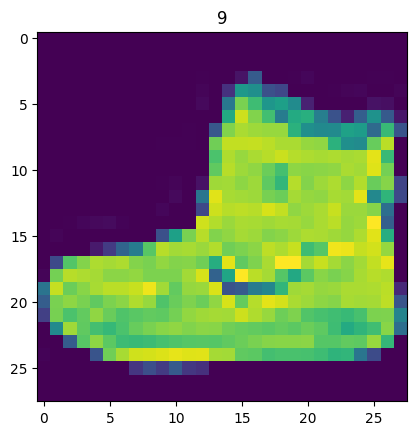

In [9]:
plt.imshow(image.squeeze())
plt.title(label);

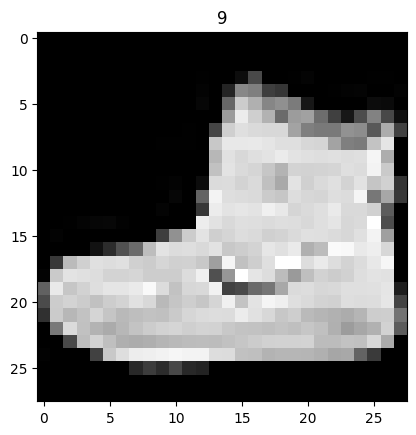

In [10]:
plt.imshow(image.squeeze(), cmap ='gray')
plt.title(label);

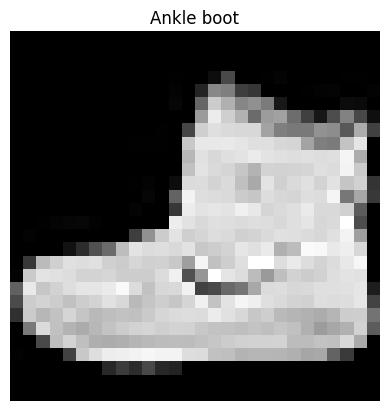

In [11]:
plt.imshow(image.squeeze(), cmap ='gray')
plt.title(class_names[label]);
plt.axis(False);


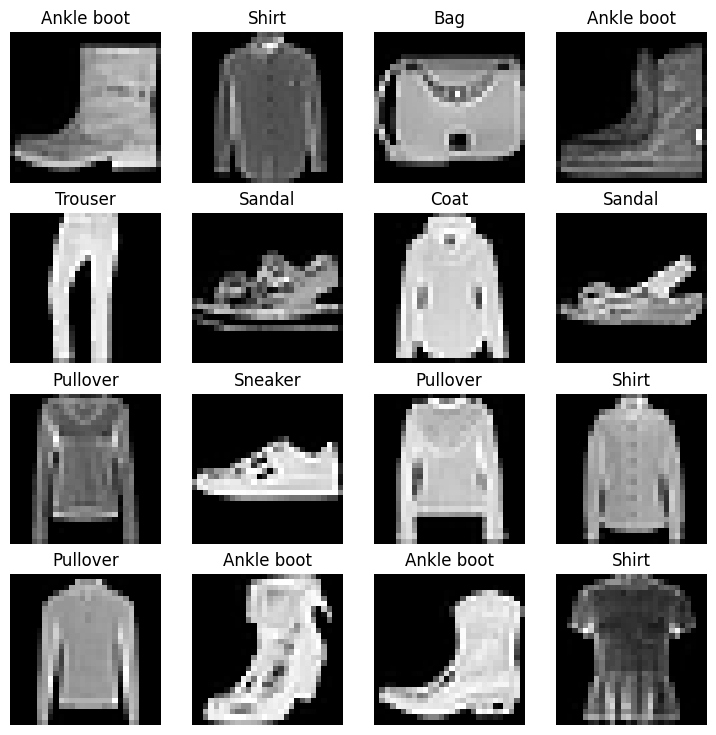

In [12]:
# Plot more image
class_names = train_data.classes
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for  i in range(1,rows * cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap ='gray')
    plt.title(class_names[label]);
    plt.axis(False);
                                         

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 
2. Prepare Dataloader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable,

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computionally efficient, as in, your 
Computation hardware may not be able to look (store in memory) at 60000 images in one hit.
So we break it down to 32 images at a time (batch size of 32).

2. It gives our neural network more chances to update its gradients per epoch.

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [14]:
from torch.utils.data import DataLoader

# setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn dataset into iterable (batches)
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x20f1111d4c0>,
 <torch.utils.data.dataloader.DataLoader at 0x20f1111de20>)

In [15]:
# let's check out what we we have created

print(f"DataLoaders: {train_dataloader, test_dataloader}")

print(f"Length df traindataloader: {len(train_dataloader)} batches of {BATCH_SIZE} ...")
print(f"Length df testdataloader: {len(test_dataloader)} batches of {BATCH_SIZE} ...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000020F1111D4C0>, <torch.utils.data.dataloader.DataLoader object at 0x0000020F1111DE20>)
Length df traindataloader: 1875 batches of 32 ...
Length df testdataloader: 313 batches of 32 ...


In [16]:
# check out what inside training Dataloader

train_features_batch, train_label_batch = next(iter(train_dataloader))

train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

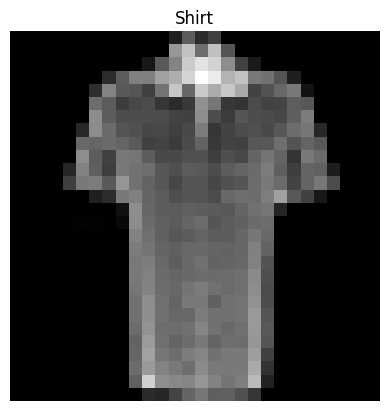

Image size: torch.Size([1, 28, 28])
label : 6, label size: torch.Size([])


In [17]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), [1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()
print(f"Image size: {img.shape}")
print(f"label : {label}, label size: {label.shape}")


# 3. Model 0: Build a basline model

When starting to building a series of machine learning modelling ,
It is best practice to start with a baseline model.

A baseline model is a simple model you will try and imporve upon with subsequent models/Experiements.

In othert words: start simply and add complexity when necessary.

In [18]:
# creating a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
#print(x.shape)

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height * width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height * width]


In [19]:
#output.squeeze()

In [20]:
# Building a model

class FashionMNISTModelV0(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= input_shape,out_features=hidden_units),
            nn.Linear(in_features= hidden_units,out_features=hidden_units),
            nn.Linear(in_features= hidden_units,out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)
            
            

In [21]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape= 784, # that is 28 * 28
    hidden_units = 10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
    ).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [22]:
next(model_0.parameters()).device

device(type='cpu')

In [23]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.2826,  0.0491, -0.0742, -0.1099, -0.0071,  0.1045, -0.3287,  0.0522,
          0.3119, -0.3001]], grad_fn=<AddmmBackward0>)

# 3.1 Setup loss, optimizer and evaluation metrics
* Loss Function: Since we are working with multi-class data, our loss function will be nn.CrossEntropyLoss()
* Optimizer- our optimizer 'torch.optim.SGD()' (stochastic gradient descent)
* Evaluation metric - Since we are working on a classification problem, let's use accuracy as our evaluation metrics

In [24]:
def accuracy_fn(y_true, y_pred):
    """ Calculate accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 99.9999
    """
    correct = torch.eq(y_true, y_pred).sum().item()

    acc = (correct/len(y_pred)) * 100
    return acc

In [25]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

### 3.2 creating a function to time our experiments

machine learning is very experimental.

Two of the main things you will often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

https://docs.python.org/3/library/timeit.html

In [26]:
from timeit import default_timer as timer

def print_train_time(start: float,
                    end: float,
                    device : torch.device = None):
    """ Prints difference between start and end time."""
    total_time = end - start

    print(f"trin time on {device}: {total_time:.3f} seconds")
    return total_time
    
    

In [27]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

trin time on cpu: 0.000 seconds


1.4000000000180535e-05

### UPTOHERE: 3.3 creating a trainin g loop and training model on batches of data...
### Highlight that optimizer will update a model's parameters once per batch rather then ones per epoch....

# 3.3 creating a trainin g loop and training model on batches of data

1. loop through epochs.
2. loop through the training batches, perform training steps, calculate the train loss *per batch*
3. loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print out what's happening
5. time it all 

 
 https://github.com/tqdm/tqdm

In [28]:
from tqdm import tqdm
for i in tqdm(range(10000)):
    pass

100%|██████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 10005496.18it/s]


In [29]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs (we will keep this small for faster training time)
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-----")
    # Training
    train_loss, train_acc = 0, 0
    # Add a loop to loop the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # 1. Forward Pass
        y_pred = model_0(X)

        
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # 3. Calcuate accuracy
        train_acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1))
        
        # 4. Optimizer zero grad
        optimizer.zero_grad()

        # 5. Loss backward
        loss.backward()

        # 6. Optimizer Step (Grdient desecent)
        optimizer.step()

        # Print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} smaples.")

    # Devide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    # Calculate the test acc 
    train_acc /= len(train_dataloader)


    ## Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. forward Pass
            test_pred = model_0(X_test)

            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calcuate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred= test_pred.argmax(dim=1))   

        # Calculate test loss
        test_loss /= len(test_dataloader)

        # Calculate the test acc 
        test_acc /= len(test_dataloader)

    # Print out what's happening
    print(f"\n Train loss: {train_loss:.4f}| Train Accuracy: {train_acc:.2f}| Test loss {test_loss:.4f}| Test Accuracy: {test_acc:.2f}") 

train_time_end_on_cpu = timer()
print_train_time(start=train_time_start_on_cpu,
                 end=train_time_end_on_cpu, 
                 device=str(next(model_0.parameters()).device ))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 smaples.
Looked at 12800/60000 smaples.
Looked at 25600/60000 smaples.
Looked at 38400/60000 smaples.
Looked at 51200/60000 smaples.

 Train loss: 0.6355| Train Accuracy: 77.11| Test loss 0.5304| Test Accuracy: 80.79
Epoch: 1
-----
Looked at 0/60000 smaples.
Looked at 12800/60000 smaples.
Looked at 25600/60000 smaples.
Looked at 38400/60000 smaples.
Looked at 51200/60000 smaples.

 Train loss: 0.4999| Train Accuracy: 82.39| Test loss 0.4911| Test Accuracy: 82.63
Epoch: 2
-----
Looked at 0/60000 smaples.
Looked at 12800/60000 smaples.
Looked at 25600/60000 smaples.
Looked at 38400/60000 smaples.
Looked at 51200/60000 smaples.

 Train loss: 0.4741| Train Accuracy: 83.28| Test loss 0.4989| Test Accuracy: 82.86
trin time on cpu: 177.934 seconds


177.9341547

In [30]:
len(train_dataloader)

1875

In [31]:
str(next(model_0.parameters()).device )

'cpu'

# 4. Make Predictions and get Model_0 results


In [49]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device):
    """ Returns a dictionary containing the results of model predicting on data_loader."""

    loss, acc = 0 , 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Put data on target device
            X, y = X.to(device), y.to(device)
            # Make prediction
            y_pred = model(X)
    
            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred = y_pred.argmax(dim=1))
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name" : model.__class__.__name__, # only works whwn model was created with a class
            "model_loss" : loss.item(),
            "model_acc" : acc}

# Calculate model_0 results on test datasets
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device = 'cpu')
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.49889200925827026,
 'model_acc': 82.85742811501598}

### 5. Setup device agnostic-code (for using a GPU if there is one)

In [33]:
!nvidia-smi

Sat Aug 24 15:41:12 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.30       Driver Version: 522.30       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   44C    P8    15W /  N/A |      0MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [34]:
torch.cuda.is_available()

True

In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### 6. Model_1 : Building a better model with non-linearity



In [36]:
# create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into a single vector
            nn.Linear(in_features=input_shape, out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features= hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features= output_shape))

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)        
                 

In [37]:
# Create an instance of model_1

torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape= 784, # this is the output of flatten after our 28*28
                             hidden_units= 10,
                             output_shape= len(class_names)).to(device) # send to the GPU if it's available
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [38]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [39]:
!nvidia-smi

Sat Aug 24 15:41:12 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 522.30       Driver Version: 522.30       CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P0    34W /  N/A |    138MiB /  8192MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [40]:
# Creating loss function and Optimizer

loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is

optimizer = torch.optim.SGD(params= model_1.parameters(), lr = 0.1) # tries to update our model's parameters to reduce the loss


### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
  * training loop- train_step()
  * testing loop- test_step()

In [41]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device ):
    """ Performs a training with a model trying to learn on data_loader"""
    
    # Training
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train()
    
    # Add a loop to loop the training batches
    for batch, (X, y) in enumerate(data_loader):
        # Put data on target device
        X, y = X.to(device), y.to(device)
       
        # 1. Forward Pass
        y_pred = model(X)
    
        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
    
        # 3. Calcuate accuracy
        train_acc += accuracy_fn(y_true=y, y_pred= y_pred.argmax(dim=1)) # go from logits -> prediction label 
        
        # 4. Optimizer zero grad
        optimizer.zero_grad()
    
        # 5. Loss backward
        loss.backward()
    
        # 6. Optimizer Step (Grdient desecent)
        optimizer.step()
    
    # Devide total train loss by length of train dataloader
    train_loss /= len(data_loader)
    
    # Calculate the test acc 
    train_acc /= len(data_loader)
    # Print out what's happening
    print(f"Train loss: {train_loss:.5f}| Train Accuracy: {train_acc:.2f}")



In [42]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device ):
    
     """ Performs a testing with a model trying to learn on data_loader"""
     ## Testing
     test_loss, test_acc = 0, 0
     model.eval()
     with torch.inference_mode():
        for X_test, y_test in data_loader:
            # Put data on target device
            X_test, y_test = X_test.to(device), y_test.to(device)
            # 1. forward Pass
            test_pred = model(X_test)
    
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
    
            # 3. Calcuate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred= test_pred.argmax(dim=1))  # go from logits -> prediction label 
    
        # Calculate test loss
        test_loss /= len(data_loader)
    
        # Calculate the test acc 
        test_acc /= len(data_loader)
    
        # Print out what's happening
        print(f"Test loss {test_loss:.5f}| Test Accuracy: {test_acc:.2f}") 

In [43]:
# Measure time
train_time_start_on_cpu = timer()

# randm seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set epochs
epochs = 100

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------------------------------")
    train_step(model=model_1,
               data_loader= train_dataloader,
               loss_fn= loss_fn,
               optimizer= optimizer,
               accuracy_fn= accuracy_fn,
               device = device )
    test_step(model= model_1,
               data_loader= test_dataloader,
               loss_fn= loss_fn,
               accuracy_fn= accuracy_fn,
               device = device )

train_time_end_on_cpu = timer()
print_train_time(start=train_time_start_on_cpu,
                 end=train_time_end_on_cpu, 
                 device = device )
    

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0
------------------------------------
Train loss: 0.66768| Train Accuracy: 75.88
Test loss 0.50100| Test Accuracy: 82.09
Epoch: 1
------------------------------------
Train loss: 0.48335| Train Accuracy: 82.86
Test loss 0.49603| Test Accuracy: 82.43
Epoch: 2
------------------------------------
Train loss: 0.44929| Train Accuracy: 83.89
Test loss 0.49073| Test Accuracy: 82.62
Epoch: 3
------------------------------------
Train loss: 0.43032| Train Accuracy: 84.54
Test loss 0.45669| Test Accuracy: 83.51
Epoch: 4
------------------------------------
Train loss: 0.41983| Train Accuracy: 84.83
Test loss 0.46542| Test Accuracy: 83.49
Epoch: 5
------------------------------------
Train loss: 0.40924| Train Accuracy: 85.17
Test loss 0.45525| Test Accuracy: 83.85
Epoch: 6
------------------------------------
Train loss: 0.40088| Train Accuracy: 85.64
Test loss 0.45992| Test Accuracy: 83.91
Epoch: 7
------------------------------------
Train loss: 0.39638| Train Accuracy: 85.74
Test los

2272.6661643

> ** Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than GPU
>
> Why is this?
>
> 1. It could be that the overhead for copying data/model to and form the GPU outweighs the compute benefits offered by the GPU.
> 2. The hardware you're using has a better CPU in terms compute capbility than the GPU.
> 3. https://horace.io/brrr_intro.html

In [44]:
# Model_0 results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.49889200925827026,
 'model_acc': 82.85742811501598}

In [50]:
# Calculate model_0 results on test datasets
model_0_results = eval_model(model=model_1,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn,
                            device = device)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.47843894362449646,
 'model_acc': 84.25519169329074}